# First steps on pyspark

## Initialization

Émissions de CO2e sur les liaisons TGV
https://www.sncf.com/fr/engagements/developpement-durable/engagement-grand-groupe-pour-la-planete.
données : https://www.data.gouv.fr/fr/datasets/r/9cbb2e7d-058b-4e58-b93b-2de23da80d70

In [4]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 12.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 12.9 MB/s eta 0:00:00


In [5]:
import pandas

In [63]:
df = pandas.read_csv("https://www.data.gouv.fr/fr/datasets/r/d5f400de-ae3f-4966-8cb6-a85c70c6c24a", sep="\t")
df.head()

/tmp/ipykernel_98/1748411573.py:1: DtypeWarning: Columns (0,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv("https://www.data.gouv.fr/fr/datasets/r/d5f400de-ae3f-4966-8cb6-a85c70c6c24a", sep="\t")


,Code du département,Libellé du département,Code de la collectivité à statut particulier,Libellé de la collectivité à statut particulier,Code de la commune,Libellé de la commune,Nom de l'élu,Prénom de l'élu,Code sexe,Date de naissance,Code de la catégorie socio-professionnelle,Libellé de la catégorie socio-professionnelle,Date de début du mandat,Libellé de la fonction,Date de début de la fonction,Code nationalité
0,1,Ain,NaN,NaN,1001,L'Abergement-Clémenciat,BARRET,Yohann,M,09/02/1976,31.0,Profession libérale,18/05/2020,NaN,NaN,FR
1,1,Ain,NaN,NaN,1001,L'Abergement-Clémenciat,BEAUDET,Sylvie,F,25/03/1967,12.0,Agriculteur sur moyenne exploitation,18/05/2020,NaN,NaN,FR
2,1,Ain,NaN,NaN,1001,L'Abergement-Clémenciat,BERAUD,Zélie,F,26/03/1980,43.0,Profession intermédiaire de la santé et du tra...,18/05/2020,NaN,NaN,FR
3,1,Ain,NaN,NaN,1001,L'Abergement-Clémenciat,BOUILLOUX,Delphine,F,02/08/1977,38.0,Ingénieur et cadre technique d'entreprise,18/05/2020,NaN,NaN,FR
4,1,Ain,NaN,NaN,1001,L'Abergement-Clémenciat,BOULON,Daniel,M,04/03/1951,74.0,Ancien cadre,18/05/2020,Maire,26/05/2020,FR


In [108]:
df.shape

(498659, 16)

In [91]:
data = list(map(tuple, df.itertuples()))
setlen = set(map(len, data))
setlen

{17}

In [92]:
data[0]

(0,
 1,
 'Ain',
 nan,
 nan,
 1001,
 "L'Abergement-Clémenciat",
 'BARRET',
 'Yohann',
 'M',
 '09/02/1976',
 31.0,
 'Profession libérale',
 '18/05/2020',
 nan,
 nan,
 'FR')

In [125]:
import pyspark
from pyspark.sql import SparkSession

In [126]:
spark = SparkSession.builder.appName("sparksql").getOrCreate()

In [164]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType

cols = [StructField("index", IntegerType(), True)]
for name, typ in zip(df.columns, df.dtypes):
    if "float64" in str(typ):
        cols.append(StructField(name, DoubleType(), True))
    else:
        cols.append(StructField(name, StringType(), True))
schema = StructType(cols)
encoded_name = schema.fields[0].name.encode('utf-8')
schema

StructType([StructField('index', IntegerType(), True), StructField('Code du département', StringType(), True), StructField('Libellé du département', StringType(), True), StructField('Code de la collectivité à statut particulier', DoubleType(), True), StructField('Libellé de la collectivité à statut particulier', StringType(), True), StructField('Code de la commune', StringType(), True), StructField('Libellé de la commune', StringType(), True), StructField('Nom de l'élu', StringType(), True), StructField('Prénom de l'élu', StringType(), True), StructField('Code sexe', StringType(), True), StructField('Date de naissance', StringType(), True), StructField('Code de la catégorie socio-professionnelle', DoubleType(), True), StructField('Libellé de la catégorie socio-professionnelle', StringType(), True), StructField('Date de début du mandat', StringType(), True), StructField('Libellé de la fonction', StringType(), True), StructField('Date de début de la fonction', StringType(), True), Struct

In [165]:
dfs = spark.createDataFrame(data, schema=schema)
dfs.show()

2023-04-11 23:38:16,433 WARN scheduler.TaskSetManager: Stage 22 contains a task of very large size (24718 KiB). The maximum recommended task size is 1000 KiB.


+-----+-------------------+----------------------+--------------------------------------------+-----------------------------------------------+------------------+---------------------+-----------------+---------------+---------+-----------------+------------------------------------------+---------------------------------------------+-----------------------+----------------------+----------------------------+----------------+
|index|Code du département|Libellé du département|Code de la collectivité à statut particulier|Libellé de la collectivité à statut particulier|Code de la commune|Libellé de la commune|     Nom de l'élu|Prénom de l'élu|Code sexe|Date de naissance|Code de la catégorie socio-professionnelle|Libellé de la catégorie socio-professionnelle|Date de début du mandat|Libellé de la fonction|Date de début de la fonction|Code nationalité|
+-----+-------------------+----------------------+--------------------------------------------+-----------------------------------------------

In [166]:
dfs.columns

['index',
 'Code du département',
 'Libellé du département',
 'Code de la collectivité à statut particulier',
 'Libellé de la collectivité à statut particulier',
 'Code de la commune',
 'Libellé de la commune',
 "Nom de l'élu",
 "Prénom de l'élu",
 'Code sexe',
 'Date de naissance',
 'Code de la catégorie socio-professionnelle',
 'Libellé de la catégorie socio-professionnelle',
 'Date de début du mandat',
 'Libellé de la fonction',
 'Date de début de la fonction',
 'Code nationalité']

In [167]:
dfs.printSchema()

root
 |-- index: integer (nullable = true)
 |-- Code du département: string (nullable = true)
 |-- Libellé du département: string (nullable = true)
 |-- Code de la collectivité à statut particulier: double (nullable = true)
 |-- Libellé de la collectivité à statut particulier: string (nullable = true)
 |-- Code de la commune: string (nullable = true)
 |-- Libellé de la commune: string (nullable = true)
 |-- Nom de l'élu: string (nullable = true)
 |-- Prénom de l'élu: string (nullable = true)
 |-- Code sexe: string (nullable = true)
 |-- Date de naissance: string (nullable = true)
 |-- Code de la catégorie socio-professionnelle: double (nullable = true)
 |-- Libellé de la catégorie socio-professionnelle: string (nullable = true)
 |-- Date de début du mandat: string (nullable = true)
 |-- Libellé de la fonction: string (nullable = true)
 |-- Date de début de la fonction: string (nullable = true)
 |-- Code nationalité: string (nullable = true)



In [133]:
dfs.write.mode("overwrite").format("parquet").save("data/elu.parquet")

2023-04-11 23:23:35,630 WARN scheduler.TaskSetManager: Stage 21 contains a task of very large size (24718 KiB). The maximum recommended task size is 1000 KiB.


In [ ]:
dfs.write.csv("data/elu.csv")

In [168]:
!hdfs dfs -ls

Found 8 items
drwxr-xr-x   - onyxia users       4096 2023-04-11 22:10 .ipynb_checkpoints
drwxr-xr-x   - onyxia users       4096 2023-04-11 23:23 data
drwxr-xr-x   - onyxia users       4096 2023-04-11 22:37 donnees.parquet
drwxr-xr-x   - onyxia users       4096 2023-04-11 22:42 donnees2.parquet
-rw-r--r--   1 onyxia users      45488 2023-04-11 23:34 example.ipynb
drwxrwx---   - root   users      16384 2023-04-11 21:59 lost+found
drwxr-xr-x   - onyxia users       4096 2023-04-11 22:46 train.parquet
drwxr-xr-x   - onyxia users       4096 2023-04-11 22:50 ~


In [145]:
!hdfs dfs -ls --help

-ls: Illegal option --help
Usage: hadoop fs [generic options]
	[-appendToFile <localsrc> ... <dst>]
	[-cat [-ignoreCrc] <src> ...]
	[-checksum [-v] <src> ...]
	[-chgrp [-R] GROUP PATH...]
	[-chmod [-R] <MODE[,MODE]... | OCTALMODE> PATH...]
	[-chown [-R] [OWNER][:[GROUP]] PATH...]
	[-concat <target path> <src path> <src path> ...]
	[-copyFromLocal [-f] [-p] [-l] [-d] [-t <thread count>] [-q <thread pool queue size>] <localsrc> ... <dst>]
	[-copyToLocal [-f] [-p] [-crc] [-ignoreCrc] [-t <thread count>] [-q <thread pool queue size>] <src> ... <localdst>]
	[-count [-q] [-h] [-v] [-t [<storage type>]] [-u] [-x] [-e] [-s] <path> ...]
	[-cp [-f] [-p | -p[topax]] [-d] [-t <thread count>] [-q <thread pool queue size>] <src> ... <dst>]
	[-createSnapshot <snapshotDir> [<snapshotName>]]
	[-deleteSnapshot <snapshotDir> <snapshotName>]
	[-df [-h] [<path> ...]]
	[-du [-s] [-h] [-v] [-x] <path> ...]
	[-expunge [-immediate] [-fs <path>]]
	[-find <path> ... <expression> ...]
	[-get [-f] [-p] [-crc] [-ig

In [136]:
!hdfs dfs -ls data/elu.parquet/

Found 1 items
-rw-r--r--   1 onyxia users          0 2023-04-11 23:23 data/elu.parquet/_SUCCESS


## HDFS

In [35]:
!hdfs --help

Usage: hdfs [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]

  OPTIONS is none or any of:

--buildpaths                       attempt to add class files from build tree
--config dir                       Hadoop config directory
--daemon (start|status|stop)       operate on a daemon
--debug                            turn on shell script debug mode
--help                             usage information
--hostnames list[,of,host,names]   hosts to use in worker mode
--hosts filename                   list of hosts to use in worker mode
--loglevel level                   set the log4j level for this command
--workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

cacheadmin           configure the HDFS cache
crypto               configure HDFS encryption zones
debug                run a Debug Admin to execute HDFS debug commands
dfsadmin             run a DFS admin client
dfsrouteradmin       manage Router-based federation
ec                   run a HD

In [36]:
!hdfs dfs --help

--help: Unknown command
Usage: hadoop fs [generic options]
	[-appendToFile <localsrc> ... <dst>]
	[-cat [-ignoreCrc] <src> ...]
	[-checksum [-v] <src> ...]
	[-chgrp [-R] GROUP PATH...]
	[-chmod [-R] <MODE[,MODE]... | OCTALMODE> PATH...]
	[-chown [-R] [OWNER][:[GROUP]] PATH...]
	[-concat <target path> <src path> <src path> ...]
	[-copyFromLocal [-f] [-p] [-l] [-d] [-t <thread count>] [-q <thread pool queue size>] <localsrc> ... <dst>]
	[-copyToLocal [-f] [-p] [-crc] [-ignoreCrc] [-t <thread count>] [-q <thread pool queue size>] <src> ... <localdst>]
	[-count [-q] [-h] [-v] [-t [<storage type>]] [-u] [-x] [-e] [-s] <path> ...]
	[-cp [-f] [-p | -p[topax]] [-d] [-t <thread count>] [-q <thread pool queue size>] <src> ... <dst>]
	[-createSnapshot <snapshotDir> [<snapshotName>]]
	[-deleteSnapshot <snapshotDir> <snapshotName>]
	[-df [-h] [<path> ...]]
	[-du [-s] [-h] [-v] [-x] <path> ...]
	[-expunge [-immediate] [-fs <path>]]
	[-find <path> ... <expression> ...]
	[-get [-f] [-p] [-crc] [-ignor

In [124]:
!hdfs dfs -du

43955  43955  example.ipynb
0      0      lost+found
0      0      donnees2.parquet
0      0      ~
0      0      train.parquet
0      0      data
23179  23179  .ipynb_checkpoints
0      0      donnees.parquet


## Lecture

In [117]:
df2 = spark.read.csv("data/elu.csv/")

AnalysisException: Unable to infer schema for CSV. It must be specified manually.

## Group by

In [169]:
dfs.printSchema()

root
 |-- index: integer (nullable = true)
 |-- Code du département: string (nullable = true)
 |-- Libellé du département: string (nullable = true)
 |-- Code de la collectivité à statut particulier: double (nullable = true)
 |-- Libellé de la collectivité à statut particulier: string (nullable = true)
 |-- Code de la commune: string (nullable = true)
 |-- Libellé de la commune: string (nullable = true)
 |-- Nom de l'élu: string (nullable = true)
 |-- Prénom de l'élu: string (nullable = true)
 |-- Code sexe: string (nullable = true)
 |-- Date de naissance: string (nullable = true)
 |-- Code de la catégorie socio-professionnelle: double (nullable = true)
 |-- Libellé de la catégorie socio-professionnelle: string (nullable = true)
 |-- Date de début du mandat: string (nullable = true)
 |-- Libellé de la fonction: string (nullable = true)
 |-- Date de début de la fonction: string (nullable = true)
 |-- Code nationalité: string (nullable = true)



In [189]:
from pyspark.sql.functions import split
from pyspark.sql.functions import col

dfs_new = dfs.withColumn("année_naissance", split(col("Date de naissance"), "/")[2])

In [190]:
gr = dfs_new.groupBy("année_naissance").count()
gr

DataFrame[année_naissance: string, count: bigint]

In [191]:
grexe = gr.collect()
grexe

2023-04-11 23:46:58,186 WARN scheduler.TaskSetManager: Stage 40 contains a task of very large size (24718 KiB). The maximum recommended task size is 1000 KiB.


[Row(année_naissance='1953', count=10747),
 Row(année_naissance='1957', count=13411),
 Row(année_naissance='1987', count=6161),
 Row(année_naissance='1956', count=12842),
 Row(année_naissance='1936', count=136),
 Row(année_naissance='1958', count=12967),
 Row(année_naissance='1943', count=1511),
 Row(année_naissance='1972', count=13908),
 Row(année_naissance='1931', count=9),
 Row(année_naissance='1988', count=5327),
 Row(année_naissance='1938', count=287),
 Row(année_naissance='1926', count=1),
 Row(année_naissance='1932', count=31),
 Row(année_naissance='1977', count=11566),
 Row(année_naissance='1971', count=13662),
 Row(année_naissance='1984', count=8382),
 Row(année_naissance='1982', count=9919),
 Row(année_naissance='1941', count=713),
 Row(année_naissance='2000', count=763),
 Row(année_naissance='1965', count=12163),
 Row(année_naissance='1962', count=12185),
 Row(année_naissance='1954', count=11571),
 Row(année_naissance='1930', count=9),
 Row(année_naissance='1981', count=1059

In [192]:
pdf = gr.toPandas()
pdf

,année_naissance,count
0,1953,10747
1,1957,13411
2,1987,6161
3,1956,12842
4,1936,136
...,...,...
77,1933,29
78,1926,1
79,1925,1
80,1881,1


In [194]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 27.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 27.6 MB/s eta 0:00:00


<Axes: xlabel='année_naissance', ylabel='count'>

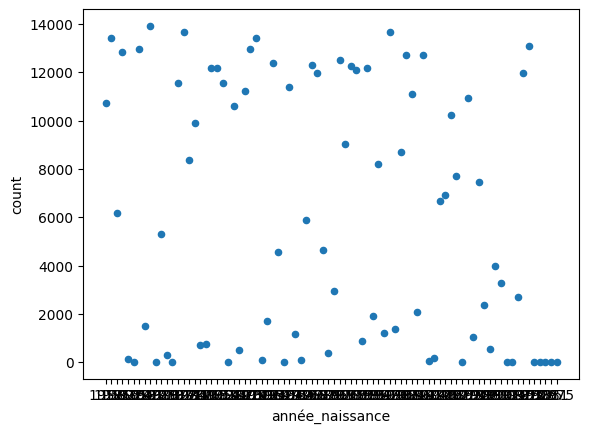

In [197]:
pdf.plot.scatter(x="année_naissance", y="count")

## Mllib

In [198]:
from pyspark.ml.regression import LinearRegression